# **FUZZY C-MEANS**

# Fuzzy C-Means Clustering
Fuzzy C-Means Clustering adalah metode yang digunakan untuk mengelompokkan data ke dalam beberapa cluster, mirip dengan K-Means, tetapi dengan pendekatan yang lebih luwes. Dalam teknik ini, setiap data tidak hanya masuk ke dalam satu cluster secara mutlak, melainkan dapat memiliki tingkat keanggotaan (membership degree) pada masing-masing cluster. Artinya, sebuah data bisa “menempel” ke lebih dari satu cluster dengan bobot tertentu yang mencerminkan seberapa dekat data tersebut dengan pusat cluster (centroid).

Berbeda dari K-Means yang bersifat “keras” (hard clustering), FCM bersifat “lunak” (soft clustering), sehingga lebih sesuai untuk data yang memiliki batasan atau perbedaan yang samar.

Gagasan Dasar Fuzzy C-Means
Konsep utama dalam FCM adalah penggunaan membership values yang menggambarkan seberapa besar kemungkinan sebuah data menjadi anggota dari masing-masing cluster. Nilai keanggotaan ini berkisar antara 0 dan 1, dengan total keanggotaan untuk setiap data ke seluruh cluster selalu berjumlah 1.

Dalam FCM, komponen utama yang perlu diperhatikan meliputi:

- Data Point: Kumpulan data yang akan dikelompokkan.

- Centroid: Titik pusat yang merepresentasikan setiap cluster.

- Matriks Keanggotaan (U): Matriks yang berisi nilai keanggotaan untuk setiap data pada setiap cluster.

- Parameter Fuzziness (m): Parameter yang menentukan seberapa kabur atau fleksibel keanggotaan data pada cluster (umumnya m=2). Nilai m yang lebih besar membuat keanggotaan data semakin kabur.


## ALGORITMA FUZZY C-MEANS CLUSTERING

Proses kerja algoritma Fuzzy C-Means adalah sebagai berikut:

1. Inisialisasi:

   * Tentukan jumlah cluster (*c*), parameter fuzziness (*m*), batas toleransi error (*ε*), dan nilai maksimum iterasi.
   * Inisialisasi *membership matrix* $U_{ij}$ secara acak, dengan syarat:

     $$
     \sum_{j=1}^c U_{ij} = 1, \quad \forall i
     $$

2. Hitung Centroid Tiap Cluster:

   $$
   v_j = \frac{\sum_{i=1}^n (U_{ij})^m \cdot x_i}{\sum_{i=1}^n (U_{ij})^m}
   $$

   Di mana:

   * $v_j$ adalah pusat cluster ke-j
   * $x_i$ adalah data ke-i
   * $U_{ij}$ adalah nilai keanggotaan data ke-i terhadap cluster ke-j

3. Update Membership Matrix:

   $$
   U_{ij} = \frac{1}{\sum_{k=1}^c \left( \frac{\|x_i - v_j\|}{\|x_i - v_k\|} \right)^{\frac{2}{m-1}}}
   $$

   Di mana:

   * $\|x_i - v_j\|$ adalah jarak antara data ke-i dengan pusat cluster ke-j

4. Pengecekan Konvergensi:

   * Jika perubahan nilai *membership matrix* kurang dari ε atau sudah mencapai iterasi maksimum, maka proses dihentikan.
   * Jika belum, kembali ke langkah 2.

## CONTOH MANUAL PERHITUNGAN FUZZY C-MEANS CLUSTERING

Berikut adalah contoh lengkap **perhitungan manual Fuzzy C-Means (FCM)** hingga konvergen, disertai dengan perhitungan **fungsi objektifnya**. Agar mudah dipahami, kita akan gunakan:


**Data:**
Misalnya kita punya 4 data satu dimensi:

$$
X = \{1, 2, 5, 6\}
$$

**Jumlah Cluster (c):** 2
**Tingkat Fuzziness (m):** 2 (umumnya digunakan)
**Kriteria Konvergensi:** perbedaan pusat cluster < 0.01



### **Langkah 1: Inisialisasi Matriks Keanggotaan $U$**

Ukuran matriks: $c \times n = 2 \times 4$

Misalkan kita mulai dari:

$$
U^{(0)} =
\begin{bmatrix}
0.6 & 0.5 & 0.4 & 0.3 \\
0.4 & 0.5 & 0.6 & 0.7 \\
\end{bmatrix}
$$

Sudah memenuhi syarat:
Jumlah keanggotaan tiap data = 1
Contoh: $0.6 + 0.4 = 1$, $0.5 + 0.5 = 1$, dst.



### **Langkah 2: Hitung Pusat Cluster (Centroid)**

Rumus:

$$
v_j = \frac{\sum_{i=1}^{n} u_{ji}^m \cdot x_i}{\sum_{i=1}^{n} u_{ji}^m}
$$

#### Untuk cluster 1:

$$
v_1 = \frac{(0.6^2 \cdot 1) + (0.5^2 \cdot 2) + (0.4^2 \cdot 5) + (0.3^2 \cdot 6)}{0.6^2 + 0.5^2 + 0.4^2 + 0.3^2}
= \frac{0.36 + 0.5 + 0.8 + 0.54}{0.36 + 0.25 + 0.16 + 0.09}
= \frac{2.2}{0.86}
\approx 2.558
$$

#### Untuk cluster 2:

$$
v_2 = \frac{(0.4^2 \cdot 1) + (0.5^2 \cdot 2) + (0.6^2 \cdot 5) + (0.7^2 \cdot 6)}{0.4^2 + 0.5^2 + 0.6^2 + 0.7^2}
= \frac{0.16 + 0.5 + 1.8 + 2.94}{0.16 + 0.25 + 0.36 + 0.49}
= \frac{5.4}{1.26}
\approx 4.286
$$



### **Langkah 3: Update Matriks Keanggotaan $U$**

Rumus:

$$
u_{ji} = \frac{1}{\sum_{k=1}^{c} \left(\frac{d(x_i, v_j)}{d(x_i, v_k)}\right)^{\frac{2}{m-1}}}
$$

#### Contoh untuk data $x_1 = 1$:

* $d(x_1, v_1) = |1 - 2.558| = 1.558$
* $d(x_1, v_2) = |1 - 4.286| = 3.286$

$$
u_{1,1} = \frac{1}{\left(\frac{1.558}{1.558}\right)^2 + \left(\frac{1.558}{3.286}\right)^2}
= \frac{1}{1 + (0.474)^2}
= \frac{1}{1 + 0.2247}
\approx 0.816
$$

$$
u_{2,1} = 1 - u_{1,1} \approx 0.184
$$

Ulangi untuk semua data dan cluster.



### **Langkah 4: Cek Konvergensi**

Bandingkan perubahan centroid $v_j$ dengan iterasi sebelumnya. Jika perubahan semua centroid < 0.01, maka **konvergen**.

Jika belum, **ulang ke Langkah 2** dengan $U$ yang baru.



### **Fungsi Objektif $J_m$**

Rumus:

$$
J_m = \sum_{j=1}^{c} \sum_{i=1}^{n} u_{ji}^m \cdot d^2(x_i, v_j)
$$

Dengan $m = 2$, dan hasil sebelumnya (misalnya iterasi awal):

$$
J_m = (0.6^2 \cdot (1 - 2.558)^2) + (0.5^2 \cdot (2 - 2.558)^2) + \dots
$$

Lanjutkan hingga menjumlahkan seluruh nilai dari 2 cluster dan 4 data. Nilai fungsi objektif ini **harus menurun** setiap iterasi.

Berikut adalah hasil perhitungan **Fuzzy C-Means (FCM)** secara manual hingga **konvergen**, dengan 4 data satu dimensi: $X = \{1, 2, 5, 6\}$, 2 cluster, dan $m = 2$:

---

### 🔁 **Iterasi Detail:**

| Iterasi | Centroid 1 | Centroid 2 | Fungsi Objektif $J_m$ | U\[1,1] | U\[1,2] | U\[1,3] | U\[1,4] | U\[2,1] | U\[2,2] | U\[2,3] | U\[2,4] |
| ------: | ---------: | ---------: | --------------------: | ------: | ------: | ------: | ------: | ------: | ------: | ------: | ------: |
|       1 |     2.5581 |     4.2857 |                7.6292 |  0.6000 |  0.5000 |  0.4000 |  0.3000 |  0.4000 |  0.5000 |  0.6000 |  0.7000 |
|       2 |     1.6944 |     5.3258 |                2.2525 |  0.8164 |  0.9437 |  0.0788 |  0.1988 |  0.1836 |  0.0563 |  0.9212 |  0.8012 |
|       3 |     1.5100 |     5.4911 |                0.9928 |  0.9749 |  0.9916 |  0.0096 |  0.0239 |  0.0251 |  0.0084 |  0.9904 |  0.9761 |
|       4 |     1.4977 |     5.5024 |                0.9839 |  0.9873 |  0.9807 |  0.0194 |  0.0127 |  0.0127 |  0.0193 |  0.9806 |  0.9873 |

---

### ✅ **Konvergensi tercapai pada Iterasi ke-4**

Perubahan centroid sudah di bawah ambang batas $\epsilon = 0.01$

---

### 📌 Interpretasi:

* **Centroid Akhir:**

  * Cluster 1: \~1.4977 (data 1 & 2)
  * Cluster 2: \~5.5024 (data 5 & 6)

* **Fungsi Objektif $J_m$** menurun dari 7.63 → 2.25 → 0.99 → 0.98, menunjukkan **konvergensi stabil**.


## IMPLEMENTASI PYTHON

Berikut juga saya lakukan visualisasi 3 Dimensi pada data Iris setelah clustering

In [1]:
import numpy as np
import pandas as pd

# Data dan parameter
X = np.array([1, 2, 5, 6])  # Data satu dimensi
c = 2                      # Jumlah cluster
m = 2.0                    # Tingkat fuzziness
epsilon = 0.01             # Ambang batas konvergensi
max_iter = 100             # Maksimum iterasi

# Inisialisasi keanggotaan U secara manual (2 x 4)
U = np.array([
    [0.6, 0.5, 0.4, 0.3],
    [0.4, 0.5, 0.6, 0.7]
])

# Fungsi untuk menghitung pusat cluster
def calculate_centroids(U, X, m):
    um = U ** m
    return (um @ X) / um.sum(axis=1)

# Fungsi untuk update U
def update_membership(X, V, m):
    n = len(X)
    c = len(V)
    U_new = np.zeros((c, n))
    for i in range(n):
        for j in range(c):
            denom_sum = 0.0
            for k in range(c):
                dist_ratio = abs(X[i] - V[j]) / abs(X[i] - V[k]) if abs(X[i] - V[k]) != 0 else 1e-10
                denom_sum += dist_ratio ** (2 / (m - 1))
            U_new[j, i] = 1.0 / denom_sum
    return U_new

# Fungsi objektif
def objective_function(U, V, X, m):
    obj = 0.0
    for j in range(c):
        for i in range(len(X)):
            obj += (U[j, i] ** m) * (abs(X[i] - V[j]) ** 2)
    return obj

# Iterasi sampai konvergen
history = []
for iteration in range(max_iter):
    V = calculate_centroids(U, X, m)
    obj = objective_function(U, V, X, m)
    history.append((iteration+1, V.copy(), U.copy(), obj))

    U_new = update_membership(X, V, m)

    if np.max(np.abs(V - calculate_centroids(U_new, X, m))) < epsilon:
        break
    U = U_new

# Konversi hasil ke DataFrame agar mudah dibaca
results = []
for iter_num, centroids, membership, obj_val in history:
    result = {
        "Iterasi": iter_num,
        "Centroid 1": centroids[0],
        "Centroid 2": centroids[1],
        "Objektif": obj_val
    }
    for j in range(c):
        for i in range(len(X)):
            result[f"U[{j+1},{i+1}]"] = membership[j, i]
    results.append(result)

df_results = pd.DataFrame(results)
df_results.round(4)  # Pembulatan 4 desimal untuk keterbacaan



,Iterasi,Centroid 1,Centroid 2,Objektif,"U[1,1]","U[1,2]","U[1,3]","U[1,4]","U[2,1]","U[2,2]","U[2,3]","U[2,4]"
0,1,2.5581,4.2857,7.6292,0.6000,0.5000,0.4000,0.3000,0.4000,0.5000,0.6000,0.7000
1,2,1.6944,5.3258,2.2525,0.8164,0.9437,0.0788,0.1988,0.1836,0.0563,0.9212,0.8012
2,3,1.5100,5.4911,0.9928,0.9749,0.9916,0.0096,0.0239,0.0251,0.0084,0.9904,0.9761
3,4,1.4977,5.5024,0.9839,0.9873,0.9807,0.0194,0.0127,0.0127,0.0193,0.9806,0.9873



## IMPLEMENTASI FUZZY C-MEANS UNTUK DATA IRIS (3 Cluster)

In [2]:
%pip install pymysql
%pip install psycopg2
%pip install scikit-fuzzy

## Library yang digunakan

In [3]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

## Ambil dan Gabungkan Data dari Database, Pisahkan Outliernya

In [4]:
def get_pg_data():
    conn = psycopg2.connect(
        # Correct the hostname if there was a typo
        host="pg-1c79828e-posgressqlpendata.i.aivencloud.com", # Verify this hostname is correct
        user="avnadmin",
        password="AVNS_lNd8P_-IyQzpcnKg3Ye",
        database="defaultdb",
        port=14572
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM bunga")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-3f95b8aa-mysqll.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_DYTBfDjLFuF2XVSXIqF",
        database="flowers_mysql",
        port=12288
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM flowermysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)


# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merge = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik tanpa kolom 'class'
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merge[feature_columns].values

# Inisialisasi model LOF
clf = LocalOutlierFactor(n_neighbors=90)
label = clf.fit_predict(data_values)

# Tambahkan hasil label ke dataframe
df_merge["outlier_label"] = label

# Cetak hasil dengan ID dan class
print(df_merge.to_string(index=False))

num_outliers = (label == -1).sum()
print(f"\nJumlah outlier: {num_outliers}")
df_filtered = df_merge[label == 1].drop(columns=["outlier_label"], errors='ignore')
outliers = df_merge[label == -1].drop(columns=["outlier_label"], errors='ignore')
print("\nData Outlier:")
print(outliers.to_string(index=False))
print("\nJumlah data setelah dihapus : ",len(df_filtered))
print("\nData tidak outlier :")
print(df_filtered.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width  outlier_label
  1     Iris-setosa           1.4          0.2           5.1          3.5              1
  2     Iris-setosa          70.0         88.0          40.9         30.0             -1
  3     Iris-setosa           1.7          0.5           4.7          3.2              1
  4     Iris-setosa           1.1          0.3           4.6          3.1              1
  5     Iris-setosa           1.4          0.2           5.0          3.6              1
  6     Iris-setosa           1.7          0.4           5.4          3.9              1
  7     Iris-setosa           0.9          1.1           4.6          3.4              1
  8     Iris-setosa           1.1          1.1           5.0          3.4              1
  9     Iris-setosa          66.0         56.0           4.4          2.9             -1
 10     Iris-setosa           1.3          1.0           4.9          3.1              1
 11     Iris-setosa  

## Visualisasi data

### Visualisasi data asli tanpa outlier dan tanpa menggunakan PCA

Ini adalah visualisasi data Iris secara 2 Dimensi tanpa menggunakan PCA

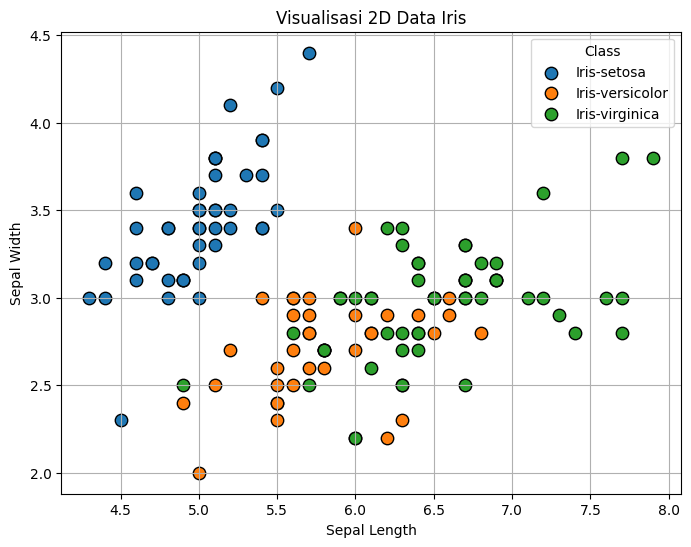

In [5]:
# Ubah kolom 'class' menjadi kategori jika belum
df_filtered['class'] = df_filtered['class'].astype('category')

# Plot 2D scatter plot
plt.figure(figsize=(8, 6))
for label in df_filtered['class'].cat.categories:
    subset = df_filtered[df_filtered['class'] == label]
    plt.scatter(subset['sepal_length'], subset['sepal_width'], label=label, s=80, edgecolors='k')

plt.title("Visualisasi 2D Data Iris")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title='Class')
plt.grid(True)
plt.show()

Ini adalah visualisasi data Iris secara 3 Dimensi tanpa menggunakan PCA

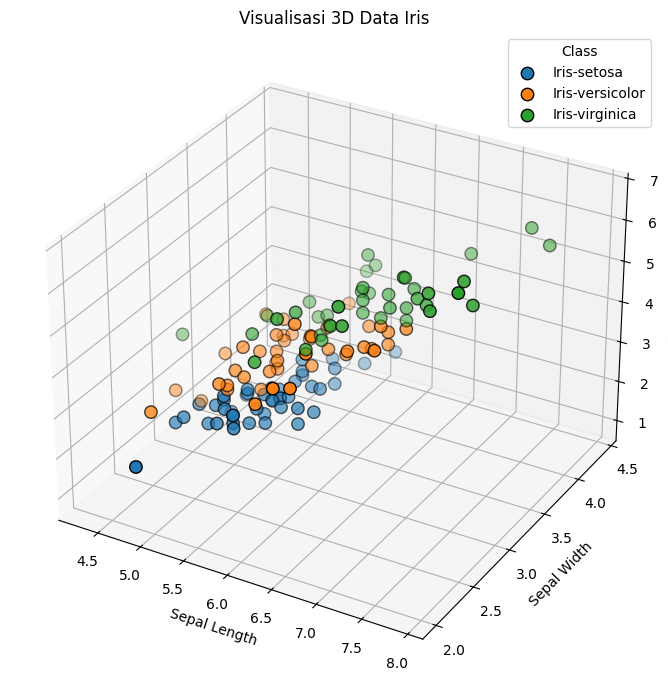

In [6]:
df_filtered['class'] = df_filtered['class'].astype('category')

# Plot 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for label in df_filtered['class'].cat.categories:
    subset = df_filtered[df_filtered['class'] == label]
    ax.scatter(
        subset['sepal_length'],
        subset['sepal_width'],
        subset['petal_length'],
        label=label,
        s=80,
        edgecolors='k'
    )

ax.set_title("Visualisasi 3D Data Iris")
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Length")
ax.legend(title='Class')
plt.tight_layout()
plt.show()

## Visualisasi data asli tanpa outlier menggunakan PCA

Ini adalah visualisasi data Iris secara 2 Dimensi menggunakan PCA

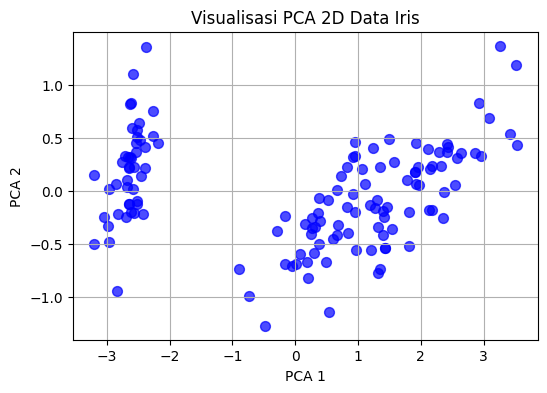

In [7]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_filtered.drop(columns=['id', 'class'])

# PCA langsung pada data mentah (belum dinormalisasi)
pca_raw = PCA(n_components=2)
reduced_raw = pca_raw.fit_transform(features_before_scaling)

# Visualisasi 2D hasil PCA sebelum normalisasi
plt.figure(figsize=(6, 4))
plt.scatter(reduced_raw[:, 0], reduced_raw[:, 1], c='blue', s=50, alpha=0.7)
plt.title("Visualisasi PCA 2D Data Iris")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Ini adalah visualisasi data Iris secara 3 Dimensi menggunakan PCA

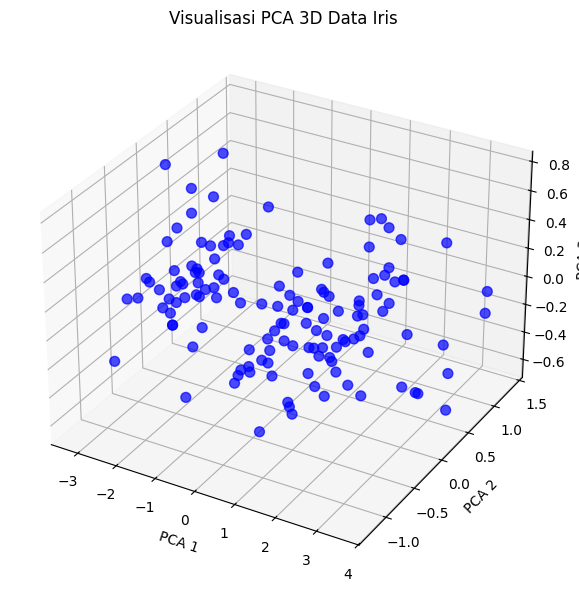

In [8]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_filtered.drop(columns=['id', 'class'])

# PCA ke 3 komponen tanpa normalisasi
pca_raw_3d = PCA(n_components=3)
reduced_raw_3d = pca_raw_3d.fit_transform(features_before_scaling)

# Visualisasi 3D hasil PCA sebelum normalisasi
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    reduced_raw_3d[:, 0],
    reduced_raw_3d[:, 1],
    reduced_raw_3d[:, 2],
    c='blue',
    s=50,
    alpha=0.7
)

ax.set_title("Visualisasi PCA 3D Data Iris")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.tight_layout()
plt.show()

## Preprocessing dan Reduksi Dimensi

### Standarisasi dengan menggunakan MinMaxScaler

Disini saya juga melakukan normalisasi menggunakan MinMaxScaler sebagai upaya untuk menyamakan skala seluruh fitur dalam dataset. Langkah ini penting karena fitur-fitur dalam data saya memiliki rentang nilai yang berbeda-beda, yang dapat memengaruhi kinerja model machine learning, terutama algoritma yang bergantung pada perhitungan jarak seperti KNN atau SVM.

MinMaxScaler bekerja dengan cara mengubah setiap nilai dalam fitur ke dalam rentang antara 0 hingga 1, berdasarkan nilai minimum dan maksimum dari fitur tersebut. Dengan skala yang seragam, algoritma dapat lebih adil dalam memproses setiap fitur tanpa berat sebelah pada fitur yang memiliki nilai lebih besar.

Setelah proses ini diterapkan, saya mendapati bahwa model menjadi lebih stabil dan performanya meningkat. Dari sini saya belajar bahwa normalisasi bukan hanya soal teknis semata, melainkan juga bagian penting dari cara kita menjaga kualitas dan keandalan data yang akan digunakan dalam proses pembelajaran mesin.

In [9]:
# Drop kolom non-numerik
features = df_filtered.drop(columns=['id', 'class'])

# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Reduksi dimensi untuk visualisasi
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(scaled_features)


Berikut adalah data hasil standarisasi menggunakan MinMaxScaler

In [10]:
print (scaled_features);

[[0.0862069  0.04166667 0.22222222 0.625     ]
 [0.13793103 0.16666667 0.11111111 0.5       ]
 [0.03448276 0.08333333 0.08333333 0.45833333]
 [0.0862069  0.04166667 0.19444444 0.66666667]
 [0.13793103 0.125      0.30555556 0.79166667]
 [0.         0.41666667 0.08333333 0.58333333]
 [0.03448276 0.41666667 0.19444444 0.58333333]
 [0.06896552 0.375      0.16666667 0.45833333]
 [0.10344828 0.04166667 0.30555556 0.70833333]
 [0.12068966 0.04166667 0.13888889 0.58333333]
 [0.03448276 0.         0.         0.41666667]
 [0.10344828 0.125      0.38888889 1.        ]
 [0.06896552 0.125      0.30555556 0.79166667]
 [0.0862069  0.08333333 0.22222222 0.625     ]
 [0.10344828 0.45833333 0.22222222 0.75      ]
 [0.03448276 0.45833333 0.30555556 0.58333333]
 [0.10344828 0.125      0.22222222 0.70833333]
 [0.01724138 0.04166667 0.08333333 0.66666667]
 [0.03448276 0.375      0.22222222 0.54166667]
 [0.10344828 0.04166667 0.13888889 0.58333333]
 [0.0862069  0.20833333 0.19444444 0.41666667]
 [0.12068966 

## Clustering menggunakan Fuzzy C-Means

### Clustering dengan 2 cluster dan Visualisasi data

Disini saya melakukan clustering menggunakan Fuzzy C-Means dengan 2 cluster sekaligus menghitung Pusat Cluster dan Fungsi Objektif dari semua iterasi, lalu melakukan visualisasi 2 Dimensi pada data Iris setelah clustering

[Fuzzy C-Means - 2 Clusters]
Silhouette Score: 0.6013
Fuzzy Partition Coefficient (FPC): 0.8473
Objective Function Value (Jm): 9.5129
Cluster Centers (in scaled feature space):
[[0.11284525 0.12882415 0.20075363 0.572816  ]
 [0.7038063  0.67386522 0.56117474 0.37218155]]
Objective Function Values per Iteration:
Iterasi 01: 21.8430
Iterasi 02: 17.9772
Iterasi 03: 17.2220
Iterasi 04: 13.8246
Iterasi 05: 9.9636
Iterasi 06: 9.5208
Iterasi 07: 9.5131
Iterasi 08: 9.5129
Iterasi 09: 9.5129


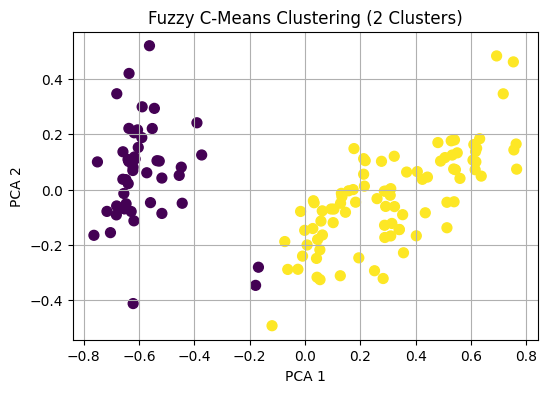

In [11]:

# Transpose fitur agar sesuai dengan input skfuzzy (fitur x sample)
data = scaled_features.T

# Fuzzy C-Means clustering
n_clusters = 2
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Ambil label keras dari keanggotaan tertinggi
labels_2 = np.argmax(u, axis=0)

# Evaluasi clustering
silhouette_fuzzy = silhouette_score(scaled_features, labels_2)

# Cetak hasil evaluasi
print(f"[Fuzzy C-Means - 2 Clusters]")
print(f"Silhouette Score: {silhouette_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"Objective Function Value (Jm): {jm[-1]:.4f}")  # ambil nilai terakhir iterasi
print(f"Cluster Centers (in scaled feature space):\n{cntr}")

# Menampilkan nilai fungsi objektif di setiap iterasi
print("Objective Function Values per Iteration:")
for i, val in enumerate(jm):
    print(f"Iterasi {i+1:02d}: {val:.4f}")


# Visualisasi hasil clustering (dalam ruang PCA)
plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_2, cmap='viridis', s=50)
plt.title("Fuzzy C-Means Clustering (2 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Berikut juga saya lakukan visualisasi 3 Dimensi pada data Iris setelah clustering

[Fuzzy C-Means - 2 Clusters]
Silhouette Score: 0.6013
Fuzzy Partition Coefficient (FPC): 0.8473
Objective Function Value (Jm): 9.5129
Cluster Centers (in scaled feature space):
[[0.11284525 0.12882415 0.20075363 0.572816  ]
 [0.7038063  0.67386522 0.56117474 0.37218155]]
Objective Function Values per Iteration:
Iterasi 01: 21.8430
Iterasi 02: 17.9772
Iterasi 03: 17.2220
Iterasi 04: 13.8246
Iterasi 05: 9.9636
Iterasi 06: 9.5208
Iterasi 07: 9.5131
Iterasi 08: 9.5129
Iterasi 09: 9.5129


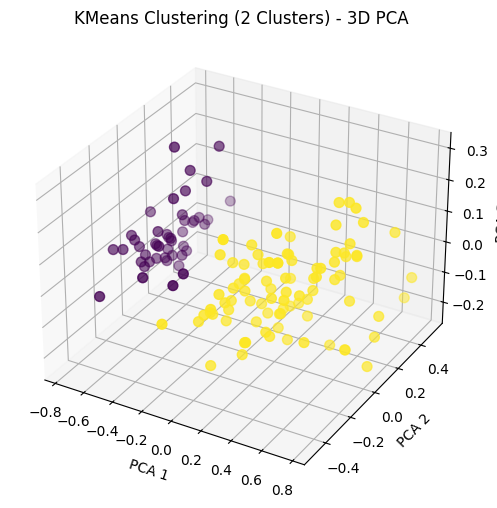

In [12]:
# PCA dengan 3 komponen untuk visualisasi 3D
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# Transpose fitur agar sesuai dengan input skfuzzy (fitur x sample)
data = scaled_features.T

# Fuzzy C-Means clustering
n_clusters = 2
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Ambil label keras dari keanggotaan tertinggi
labels_2 = np.argmax(u, axis=0)

# Evaluasi clustering
silhouette_fuzzy = silhouette_score(scaled_features, labels_2)

# Cetak hasil evaluasi
print(f"[Fuzzy C-Means - 2 Clusters]")
print(f"Silhouette Score: {silhouette_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"Objective Function Value (Jm): {jm[-1]:.4f}")  # ambil nilai terakhir iterasi
print(f"Cluster Centers (in scaled feature space):\n{cntr}")

# Menampilkan nilai fungsi objektif di setiap iterasi
print("Objective Function Values per Iteration:")
for i, val in enumerate(jm):
    print(f"Iterasi {i+1:02d}: {val:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_2, cmap='viridis', s=50
)

ax.set_title("KMeans Clustering (2 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


### Clustering dengan 3 cluster dan Visualisasi data

Disini saya melakukan clustering menggunakan Fuzzy C-Means dengan 3 cluster sekaligus menghitung Pusat Cluster dan Fungsi Objektif dari semua iterasi, lalu melakukan visualisasi 2 Dimensi pada data Iris setelah clustering

[Fuzzy C-Means - 3 Clusters]
Silhouette Score: 0.4904
Fuzzy Partition Coefficient (FPC): 0.7359
Objective Function Value (Jm): 4.9481
Cluster Centers (in scaled feature space):
[[0.58722723 0.52491533 0.43160854 0.30493935]
 [0.8061962  0.81908669 0.6782517  0.44357298]
 [0.09336664 0.10195606 0.19283542 0.59076815]]
Objective Function Values per Iteration:
Iterasi 01: 15.7093
Iterasi 02: 11.7951
Iterasi 03: 10.2582
Iterasi 04: 6.5847
Iterasi 05: 5.6404
Iterasi 06: 5.2236
Iterasi 07: 4.9984
Iterasi 08: 4.9543
Iterasi 09: 4.9489
Iterasi 10: 4.9483
Iterasi 11: 4.9482
Iterasi 12: 4.9481
Iterasi 13: 4.9481
Iterasi 14: 4.9481


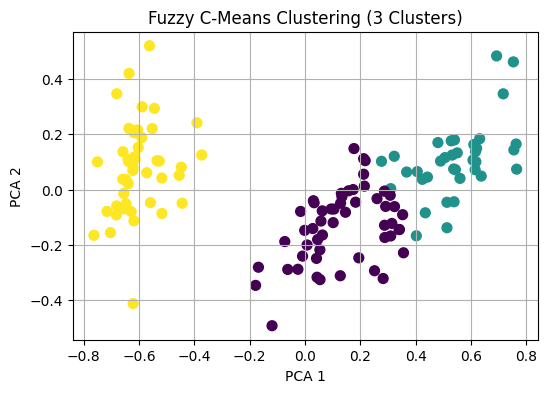

In [13]:
# Transpose fitur agar sesuai dengan input skfuzzy (fitur x sample)
data = scaled_features.T

# Fuzzy C-Means clustering
n_clusters = 3
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Ambil label keras dari keanggotaan tertinggi
labels_3 = np.argmax(u, axis=0)

# Evaluasi clustering
silhouette_fuzzy = silhouette_score(scaled_features, labels_3)

# Cetak hasil evaluasi
print(f"[Fuzzy C-Means - 3 Clusters]")
print(f"Silhouette Score: {silhouette_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"Objective Function Value (Jm): {jm[-1]:.4f}")  # ambil nilai terakhir iterasi
print(f"Cluster Centers (in scaled feature space):\n{cntr}")

# Menampilkan nilai fungsi objektif di setiap iterasi
print("Objective Function Values per Iteration:")
for i, val in enumerate(jm):
    print(f"Iterasi {i+1:02d}: {val:.4f}")


# Visualisasi hasil clustering (dalam ruang PCA)
plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_3, cmap='viridis', s=50)
plt.title("Fuzzy C-Means Clustering (3 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Berikut juga saya lakukan visualisasi 3 Dimensi pada data Iris setelah clustering

[Fuzzy C-Means - 3 Clusters]
Silhouette Score: 0.4904
Fuzzy Partition Coefficient (FPC): 0.7359
Objective Function Value (Jm): 4.9481
Cluster Centers (in scaled feature space):
[[0.58722723 0.52491533 0.43160854 0.30493935]
 [0.8061962  0.81908669 0.6782517  0.44357298]
 [0.09336664 0.10195606 0.19283542 0.59076815]]
Objective Function Values per Iteration:
Iterasi 01: 15.7093
Iterasi 02: 11.7951
Iterasi 03: 10.2582
Iterasi 04: 6.5847
Iterasi 05: 5.6404
Iterasi 06: 5.2236
Iterasi 07: 4.9984
Iterasi 08: 4.9543
Iterasi 09: 4.9489
Iterasi 10: 4.9483
Iterasi 11: 4.9482
Iterasi 12: 4.9481
Iterasi 13: 4.9481
Iterasi 14: 4.9481


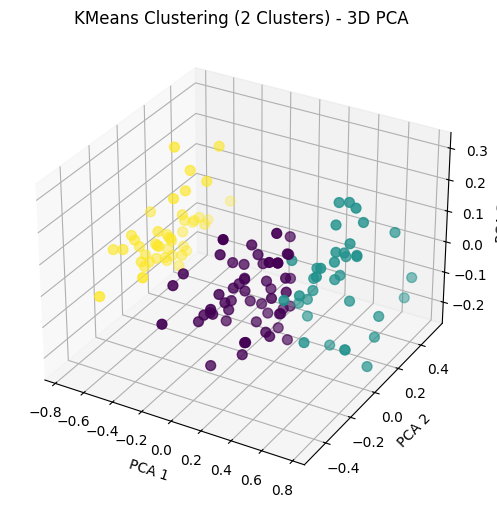

In [14]:
# PCA dengan 3 komponen untuk visualisasi 3D
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# Transpose fitur agar sesuai dengan input skfuzzy (fitur x sample)
data = scaled_features.T

# Fuzzy C-Means clustering
n_clusters = 3
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Ambil label keras dari keanggotaan tertinggi
labels_3 = np.argmax(u, axis=0)

# Evaluasi clustering
silhouette_fuzzy = silhouette_score(scaled_features, labels_3)

# Cetak hasil evaluasi
print(f"[Fuzzy C-Means - 3 Clusters]")
print(f"Silhouette Score: {silhouette_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"Objective Function Value (Jm): {jm[-1]:.4f}")  # ambil nilai terakhir iterasi
print(f"Cluster Centers (in scaled feature space):\n{cntr}")

# Menampilkan nilai fungsi objektif di setiap iterasi
print("Objective Function Values per Iteration:")
for i, val in enumerate(jm):
    print(f"Iterasi {i+1:02d}: {val:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_3, cmap='viridis', s=50
)

ax.set_title("KMeans Clustering (2 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


### Clustering dengan 4 cluster dan Visualisasi data

Disini saya melakukan clustering menggunakan Fuzzy C-Means dengan 4 cluster sekaligus menghitung Pusat Cluster dan Fungsi Objektif dari semua iterasi, lalu melakukan visualisasi 2 Dimensi pada data Iris setelah clustering

[Fuzzy C-Means - 4 Clusters]
Silhouette Score: 0.4265
Fuzzy Partition Coefficient (FPC): 0.6445
Objective Function Value (Jm): 3.6007
Cluster Centers (in scaled feature space):
[[0.53179204 0.47104037 0.36850446 0.26999919]
 [0.82767924 0.86428718 0.70495542 0.46907447]
 [0.09195459 0.09266427 0.19219972 0.59383479]
 [0.67708918 0.62957111 0.54240643 0.35881638]]
Objective Function Values per Iteration:
Iterasi 01: 12.0013
Iterasi 02: 8.9299
Iterasi 03: 8.2396
Iterasi 04: 5.8468
Iterasi 05: 4.2316
Iterasi 06: 3.8422
Iterasi 07: 3.6757
Iterasi 08: 3.6211
Iterasi 09: 3.6064
Iterasi 10: 3.6025
Iterasi 11: 3.6014
Iterasi 12: 3.6010
Iterasi 13: 3.6009
Iterasi 14: 3.6008
Iterasi 15: 3.6008
Iterasi 16: 3.6008
Iterasi 17: 3.6008
Iterasi 18: 3.6007


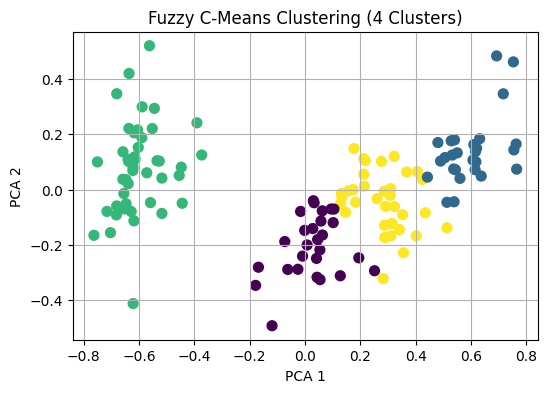

In [15]:
# Transpose fitur agar sesuai dengan input skfuzzy (fitur x sample)
data = scaled_features.T

# Fuzzy C-Means clustering
n_clusters = 4
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Ambil label keras dari keanggotaan tertinggi
labels_4 = np.argmax(u, axis=0)

# Evaluasi clustering
silhouette_fuzzy = silhouette_score(scaled_features, labels_4)

# Cetak hasil evaluasi
print(f"[Fuzzy C-Means - 4 Clusters]")
print(f"Silhouette Score: {silhouette_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"Objective Function Value (Jm): {jm[-1]:.4f}")  # ambil nilai terakhir iterasi
print(f"Cluster Centers (in scaled feature space):\n{cntr}")

# Menampilkan nilai fungsi objektif di setiap iterasi
print("Objective Function Values per Iteration:")
for i, val in enumerate(jm):
    print(f"Iterasi {i+1:02d}: {val:.4f}")


# Visualisasi hasil clustering (dalam ruang PCA)
plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_4, cmap='viridis', s=50)
plt.title("Fuzzy C-Means Clustering (4 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Berikut juga saya lakukan visualisasi 3 Dimensi pada data Iris setelah clustering

[Fuzzy C-Means - 4 Clusters]
Silhouette Score: 0.4265
Fuzzy Partition Coefficient (FPC): 0.6445
Objective Function Value (Jm): 3.6007
Cluster Centers (in scaled feature space):
[[0.53179204 0.47104037 0.36850446 0.26999919]
 [0.82767924 0.86428718 0.70495542 0.46907447]
 [0.09195459 0.09266427 0.19219972 0.59383479]
 [0.67708918 0.62957111 0.54240643 0.35881638]]
Objective Function Values per Iteration:
Iterasi 01: 12.0013
Iterasi 02: 8.9299
Iterasi 03: 8.2396
Iterasi 04: 5.8468
Iterasi 05: 4.2316
Iterasi 06: 3.8422
Iterasi 07: 3.6757
Iterasi 08: 3.6211
Iterasi 09: 3.6064
Iterasi 10: 3.6025
Iterasi 11: 3.6014
Iterasi 12: 3.6010
Iterasi 13: 3.6009
Iterasi 14: 3.6008
Iterasi 15: 3.6008
Iterasi 16: 3.6008
Iterasi 17: 3.6008
Iterasi 18: 3.6007


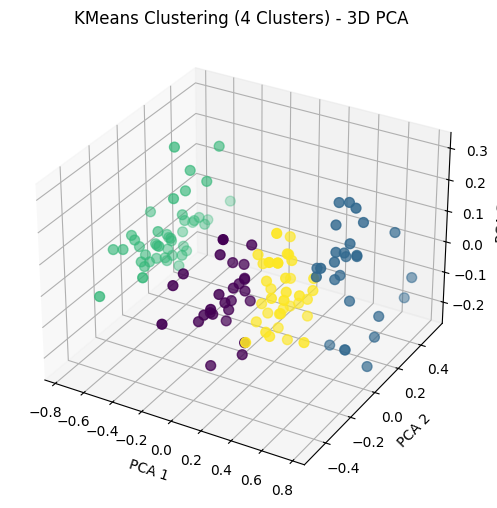

In [16]:
# PCA dengan 3 komponen
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# Fuzzy C-Means clustering
n_clusters = 4
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Ambil label keras dari keanggotaan tertinggi
labels_4 = np.argmax(u, axis=0)

# Evaluasi clustering
silhouette_fuzzy = silhouette_score(scaled_features, labels_4)

# Cetak hasil evaluasi
print(f"[Fuzzy C-Means - 4 Clusters]")
print(f"Silhouette Score: {silhouette_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"Objective Function Value (Jm): {jm[-1]:.4f}")  # ambil nilai terakhir iterasi
print(f"Cluster Centers (in scaled feature space):\n{cntr}")

# Menampilkan nilai fungsi objektif di setiap iterasi
print("Objective Function Values per Iteration:")
for i, val in enumerate(jm):
    print(f"Iterasi {i+1:02d}: {val:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_4,
    cmap='viridis',
    s=50
)

ax.set_title("KMeans Clustering (4 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()
